# General analysis of the emotions of the corpus 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from textblob import TextBlob
from textblob import Word
import time

In [3]:
%matplotlib notebook

In [4]:
#Connections with mongoDB collections
client = pymongo.MongoClient("mongodb://localhost:27017/")
mi_db = client["books"]

revsColec = mi_db["reviews"]
revsMetaColec = mi_db["revsmetadata"]
booksMetaColec = mi_db["booksmetadata"]

## Load revisions and synopsis

In [5]:
revsDF = pd.DataFrame(revsColec.find())
revsDF.sort_values('userID', ascending =  False)

,_id,revRat,revVotes,revBody,revRats,userID,userName,userLocation,bookID,bookISBN,bookISBN13,bookTile,bookAuthorID,bookAuthorName,bookFormat,bookNpages,bookAvgRating,bookRatCount,bookDescription,Price
7183,3262536550,5,0,"I absolutely loved reading, One Good Thing by ...",5,9998717,Shannon,The United States,52663163,None,None,One Good Thing,14441655,Jennifer Millikin,None,None,0,0,Today's the day I was supposed to say I do. Ki...,NaN
9272,3265829737,5,0,"Still love it, 22 years later.",5,99975384,Elinore,Sweden,52871144,None,None,Harry Potter and the Philosopher's Stone,20177109,J.K. Rowlings,Audiobook,None,4,59,None,NaN
338,3252318361,5,0,فووووق العاده بود از نظر من..توصیه میکنم اول ک...,5,99971371,Melika,None,9875755,None,9789643626006,جایی برای پیرمردها نیست,4178,Cormac McCarthy,Paperback,285,3,76,"In his blistering new novel, Cormac McCarthy r...",NaN
5761,3259454161,5,0,"I love this series, and this book was my favor...",5,9996806,Robyn,None,45231829,None,None,Murder in the Storybook Cottage (Book Retreat ...,4765396,Ellery Adams,Kindle Edition,None,4,29,"Storyton Hall, Virginia, is a top travel desti...",NaN
2282,3254400655,4,0,Nice book,4,99967113,Prince,India,2998152,0596517742,9780596517748,JavaScript: The Good Parts,1290380,Douglas Crockford,Paperback,153,4,6735,Most programming languages contain good and ba...,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,3262251352,4,0,I totally love Avery Shaw books.. I love all t...,4,10009242,Monisha,India,41681087,None,None,On Deadline & Under Fire (An Avery Shaw Myster...,6587327,Amanda M. Lee,None,327,4,614,There’s nothing Avery Shaw loves more than a c...,NaN
1875,3254097548,5,0,"Тэд жижигхэн Арлын,жижиг цамхагт 3 уулхнаа дэн...",5,100051820,Г.,Mongolia,49336599,None,9789997850256,Тэнгисийн дундах гэрэлт цамхаг,19526421,М.Л.Стедман,None,None,3,4,Барууны фронтод өнгөрүүлсэн хүндхэн дөрвөн жил...,NaN
6248,3261398749,5,0,"Based on her own true story, Alexa Kingaards n...",5,100048192,Gary,CA,51832696,None,None,KEEP FOREVER,17377658,Alexa Kingaard,Paperback,282,4,4,INSPIRED BY A TRUE STORYPaul O’Brien’s idyllic...,NaN
1802,3254063006,5,0,once again Ms Marlowe delivers an excellent an...,5,100011184,John,South Africa,52239792,None,None,The Billionaire's Surprise: A Friends to Lover...,18628861,Gigi Marlowe,ebook,111,4,27,Good friends. Great lovers.Mark has more impor...,NaN


In [6]:
#Load revisions into DataFrame
revsMetaDF = pd.DataFrame(revsMetaColec.find())
emoDict = revsMetaDF['revEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
revsMetaDF = pd.concat([revsMetaDF.loc[:, revsMetaDF.columns != 'revEmo'], emoAvgDF], axis = 1)
emoRevsMetaDF = revsMetaDF.loc[:, ['anger','disgust','sadness','surprise','fear',
                                   'trust','joy','anticipation','negative','positive'] ]
averageRevsMetaDF = emoRevsMetaDF.mean()

## Get correlation matrixes and barplots

In [10]:
# Correlation matrix for revisions
emoRevsMetaDF.corr().round(3)

,anger,disgust,sadness,surprise,fear,trust,joy,anticipation,negative,positive
anger,1.000,0.311,0.273,0.013,0.306,-0.085,-0.113,-0.067,0.287,-0.127
disgust,0.311,1.000,0.234,-0.015,0.171,-0.081,-0.112,-0.074,0.318,-0.121
sadness,0.273,0.234,1.000,-0.002,0.358,-0.086,-0.099,-0.069,0.369,-0.135
surprise,0.013,-0.015,-0.002,1.000,0.019,0.063,0.197,0.184,-0.055,0.012
fear,0.306,0.171,0.358,0.019,1.000,-0.078,-0.113,-0.047,0.283,-0.130
trust,-0.085,-0.081,-0.086,0.063,-0.078,1.000,0.228,0.064,-0.122,0.182
joy,-0.113,-0.112,-0.099,0.197,-0.113,0.228,1.000,0.214,-0.172,0.304
anticipation,-0.067,-0.074,-0.069,0.184,-0.047,0.064,0.214,1.000,-0.063,0.041
negative,0.287,0.318,0.369,-0.055,0.283,-0.122,-0.172,-0.063,1.000,-0.152
positive,-0.127,-0.121,-0.135,0.012,-0.130,0.182,0.304,0.041,-0.152,1.000


In [11]:
#Get high correlation values
emoRevsMetaDF.corr()[abs(emoRevsMetaDF.corr()[:]) > 0.3 ].round(3)

,anger,disgust,sadness,surprise,fear,trust,joy,anticipation,negative,positive
anger,1.000,0.311,NaN,NaN,0.306,NaN,NaN,NaN,NaN,NaN
disgust,0.311,1.000,NaN,NaN,NaN,NaN,NaN,NaN,0.318,NaN
sadness,NaN,NaN,1.000,NaN,0.358,NaN,NaN,NaN,0.369,NaN
surprise,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fear,0.306,NaN,0.358,NaN,1.000,NaN,NaN,NaN,NaN,NaN
trust,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
joy,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0.304
anticipation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
negative,NaN,0.318,0.369,NaN,NaN,NaN,NaN,NaN,1.000,NaN
positive,NaN,NaN,NaN,NaN,NaN,NaN,0.304,NaN,NaN,1.000


In [12]:
#Load synopsis into DataFrame
booksMetaDF = pd.DataFrame(booksMetaColec.find())
emoDict = booksMetaDF['descrEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
booksMetaDF = pd.concat([booksMetaDF.loc[:, booksMetaDF.columns != 'descrEmo'], emoAvgDF], axis = 1)
booksMetaDF
emoBooksMetaDF = booksMetaDF.loc[:, ['anger','disgust','sadness','surprise','fear',
                                   'trust','joy','anticipation','negative','positive'] ]
averageBooksMetaDF = emoBooksMetaDF.mean()
#averageBooksMetaDF.plot.barh(color='r')

<IPython.core.display.Javascript object>


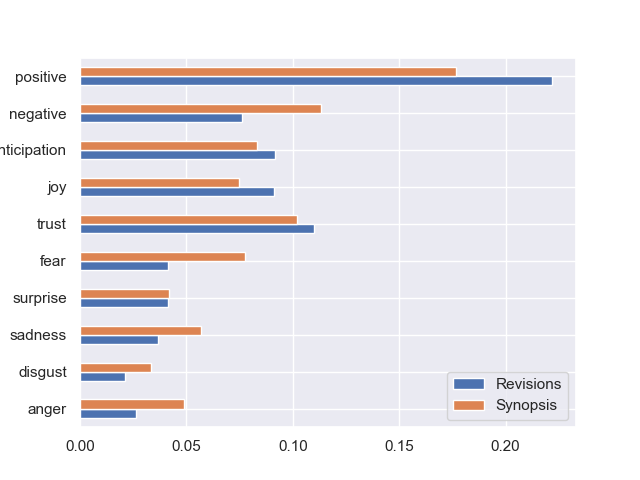

In [13]:
#Get a barplot for the emotions in revisions and synopsis
df = pd.concat([averageRevsMetaDF, averageBooksMetaDF], axis = 1)
df.columns = ['Revisions', 'Synopsis'] 
df.plot.barh()

In [14]:
#Correlation matrix for synopsis
emoBooksMetaDF.corr().round(3)

,anger,disgust,sadness,surprise,fear,trust,joy,anticipation,negative,positive
anger,1.000,0.480,0.424,0.098,0.534,0.025,-0.039,0.054,0.506,-0.006
disgust,0.480,1.000,0.293,0.061,0.320,0.009,-0.041,0.007,0.418,-0.033
sadness,0.424,0.293,1.000,0.092,0.580,0.016,-0.014,0.045,0.563,-0.037
surprise,0.098,0.061,0.092,1.000,0.120,0.140,0.430,0.280,0.076,0.255
fear,0.534,0.320,0.580,0.120,1.000,0.040,-0.030,0.079,0.586,-0.004
trust,0.025,0.009,0.016,0.140,0.040,1.000,0.371,0.275,0.023,0.488
joy,-0.039,-0.041,-0.014,0.430,-0.030,0.371,1.000,0.419,-0.043,0.563
anticipation,0.054,0.007,0.045,0.280,0.079,0.275,0.419,1.000,0.052,0.347
negative,0.506,0.418,0.563,0.076,0.586,0.023,-0.043,0.052,1.000,0.009
positive,-0.006,-0.033,-0.037,0.255,-0.004,0.488,0.563,0.347,0.009,1.000


In [15]:
#Get high correlation values
emoBooksMetaDF.corr()[abs(emoBooksMetaDF.corr()[:]) > 0.5 ].round(3)

,anger,disgust,sadness,surprise,fear,trust,joy,anticipation,negative,positive
anger,1.000,NaN,NaN,NaN,0.534,NaN,NaN,NaN,0.506,NaN
disgust,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sadness,NaN,NaN,1.000,NaN,0.580,NaN,NaN,NaN,0.563,NaN
surprise,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fear,0.534,NaN,0.580,NaN,1.000,NaN,NaN,NaN,0.586,NaN
trust,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
joy,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0.563
anticipation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
negative,0.506,NaN,0.563,NaN,0.586,NaN,NaN,NaN,1.000,NaN
positive,NaN,NaN,NaN,NaN,NaN,NaN,0.563,NaN,NaN,1.000


## Histogram for each emotion in the corpus

<IPython.core.display.Javascript object>


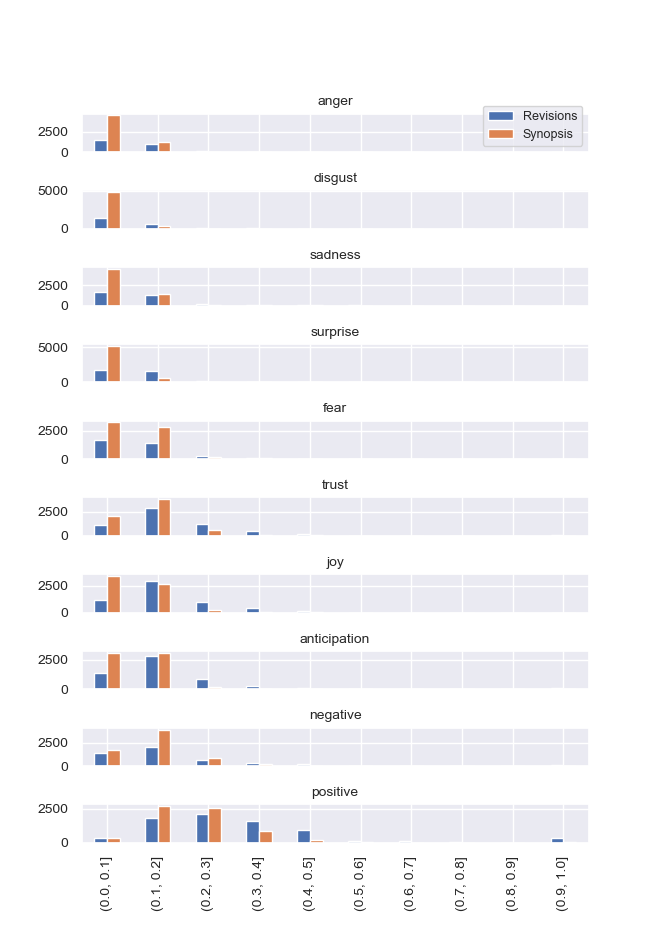

C:\Users\NITROPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  after removing the cwd from sys.path.


In [45]:
emotionsList = ['anger','disgust','sadness','surprise','fear','trust','joy','anticipation','negative','positive']
bins =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
fig , axes = plt.subplots(10, 1, sharex = True)
fig.tight_layout()
fig.subplots_adjust(hspace=1)

plt.rc('legend',fontsize=9)

#for i in range(1, 9):
#plt.rcParams.update({'font.size': 10})

pos = 0
for emotion in emotionsList:
    emotionRevsSerie = emoRevsMetaDF[emotion]
    emotionBooksSerie = emoBooksMetaDF[emotion]

    catsRevs = pd.cut(emotionRevsSerie, bins)
    catsBooks = pd.cut(emotionBooksSerie, bins)

    df = pd.concat([catsRevs.value_counts(), catsBooks.value_counts()], axis = 1)
    df.columns = ['Revisions', 'Synopsis'] 

    axes[pos].set_title(emotion, fontsize = 10)
    if pos == 0:
        df.plot.bar(ax = axes[pos], fontsize = 10)
    else:
        df.plot.bar(ax = axes[pos], fontsize = 10, legend=None)
 
    pos += 1

<IPython.core.display.Javascript object>


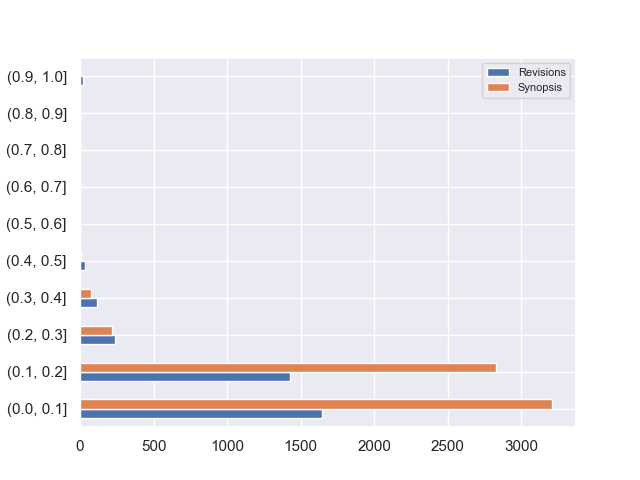

In [14]:
#A previous try with a single emotion
angerRevsSerie = emoRevsMetaDF['fear']
angerBooksSerie = emoBooksMetaDF['fear']

bins =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
catsRevs = pd.cut(angerRevsSerie, bins)
catsBooks = pd.cut(angerBooksSerie, bins)
catsBooks
df = pd.concat([catsRevs.value_counts(), catsBooks.value_counts()], axis = 1)
df.columns = ['Revisions', 'Synopsis'] 
df
p1 =df.plot.barh()